<a href="https://colab.research.google.com/github/Thandesnr/Autumn-orders/blob/main/Yahhoo_Finance_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install dash


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 16.8 MB/s eta 0:00:00


In [ ]:

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


import dash
import plotly.express as px
import plotly.graph_objects as go
from dash import dcc, html
from dash.dependencies import Input, Output

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_squared_error
from math import sqrt

from scipy.stats import uniform, randint

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,LabelEncoder

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from xgboost import XGBRegressor

from sklearn.pipeline import Pipeline



from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import  accuracy_score
from sklearn.metrics import mean_squared_error

In [ ]:
import yfinance as yf




#EDA

In [ ]:

tickers = "AAPL"
start_date = "2019-09-10"
end_date = "2024-01-09"

df = yf.download(tickers, start=start_date, end=end_date, progress=False)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-10,53.465000,54.195000,52.927502,54.174999,52.621033,127111600
2019-09-11,54.517502,55.927502,54.432499,55.897499,54.294125,177158400
2019-09-12,56.200001,56.605000,55.715000,55.772499,54.172714,128906800
2019-09-13,55.000000,55.197498,54.255001,54.687500,53.118843,159053200
2019-09-16,54.432499,55.032501,54.389999,54.974998,53.398094,84632400


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1090 entries, 2019-09-10 to 2024-01-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1090 non-null   float64
 1   High       1090 non-null   float64
 2   Low        1090 non-null   float64
 3   Close      1090 non-null   float64
 4   Adj Close  1090 non-null   float64
 5   Volume     1090 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 59.6 KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1090.000000,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03
mean,135.199074,136.763202,133.747486,135.334729,133.903584,9.929043e+07
std,38.066958,38.321374,37.807838,38.065873,38.428621,5.322561e+07
min,53.465000,54.195000,52.927502,54.174999,52.621033,2.404830e+07
25%,116.434999,117.800001,114.672497,116.102499,114.082527,6.509895e+07
50%,143.199997,144.864998,141.434998,143.185005,141.905296,8.619970e+07
75%,164.730003,166.472496,163.189999,165.187504,163.728802,1.159712e+08
max,198.020004,199.619995,197.000000,198.110001,198.110001,4.265100e+08


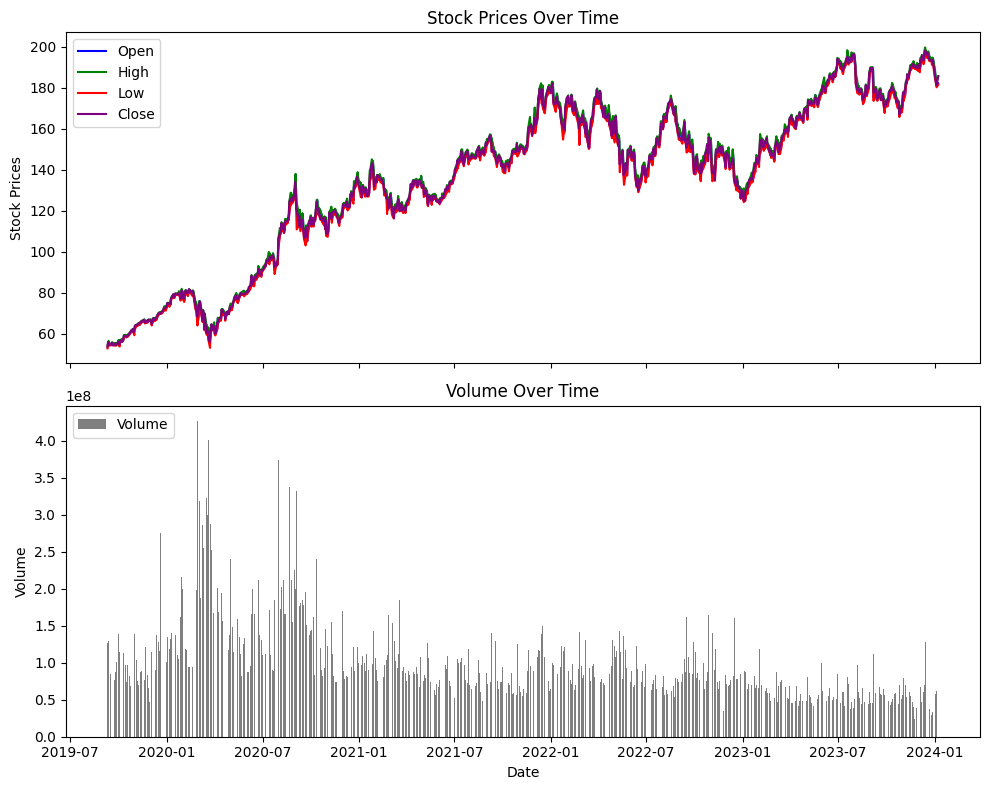

In [ ]:
# Plotting
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)

# Plotting stock prices
axes[0].plot(df.index, df['Open'], label='Open', color='blue')
axes[0].plot(df.index, df['High'], label='High', color='green')
axes[0].plot(df.index, df['Low'], label='Low', color='red')
axes[0].plot(df.index, df['Close'], label='Close', color='purple')

# Customized plots
axes[0].set_ylabel('Stock Prices')
axes[0].legend(loc='upper left')
axes[0].set_title('Stock Prices Over Time')

# Plotting volume
axes[1].bar(df.index, df['Volume'], label='Volume', color='gray')  # Change 'data' to 'df' and 'data['5. volume']' to 'df['Volume']'

# Customize the plot
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Volume')
axes[1].legend(loc='upper left')
axes[1].set_title('Volume Over Time')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# checking for missing values and their percentages

# Calculate percentage of missing values per column
missing_percentage = df.isnull().mean() * 100

# Filter columns with missing values
columns_with_missing = missing_percentage[missing_percentage > 0].index

# Print
print(f"Columns with missing values:\n{missing_percentage[columns_with_missing]}")

Columns with missing values:
Series([], dtype: float64)


ADF Statistic: -1.7254236118814863
p-value: 0.41806335436409
Critical Values: {'1%': -3.4363746281360426, '5%': -2.864200133611212, '10%': -2.568186343567528}


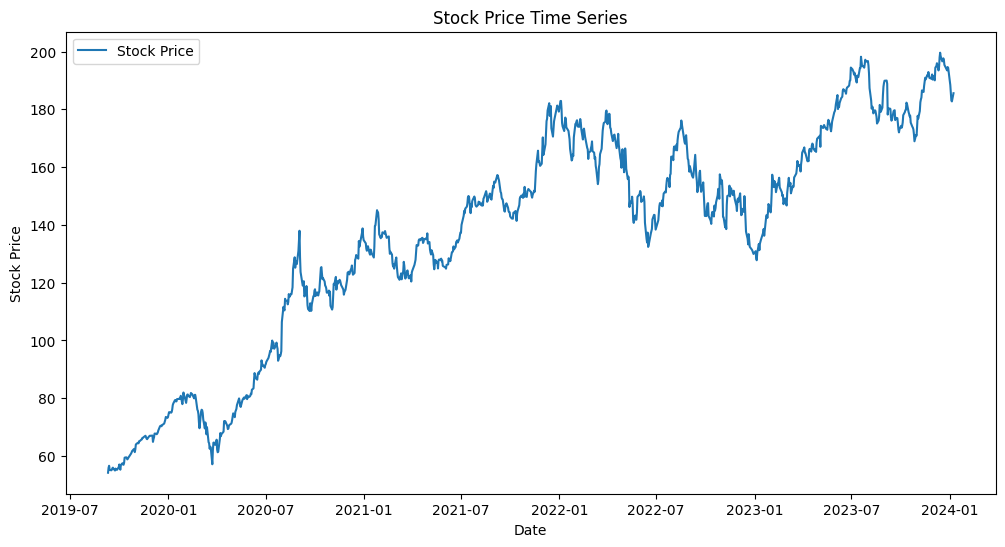

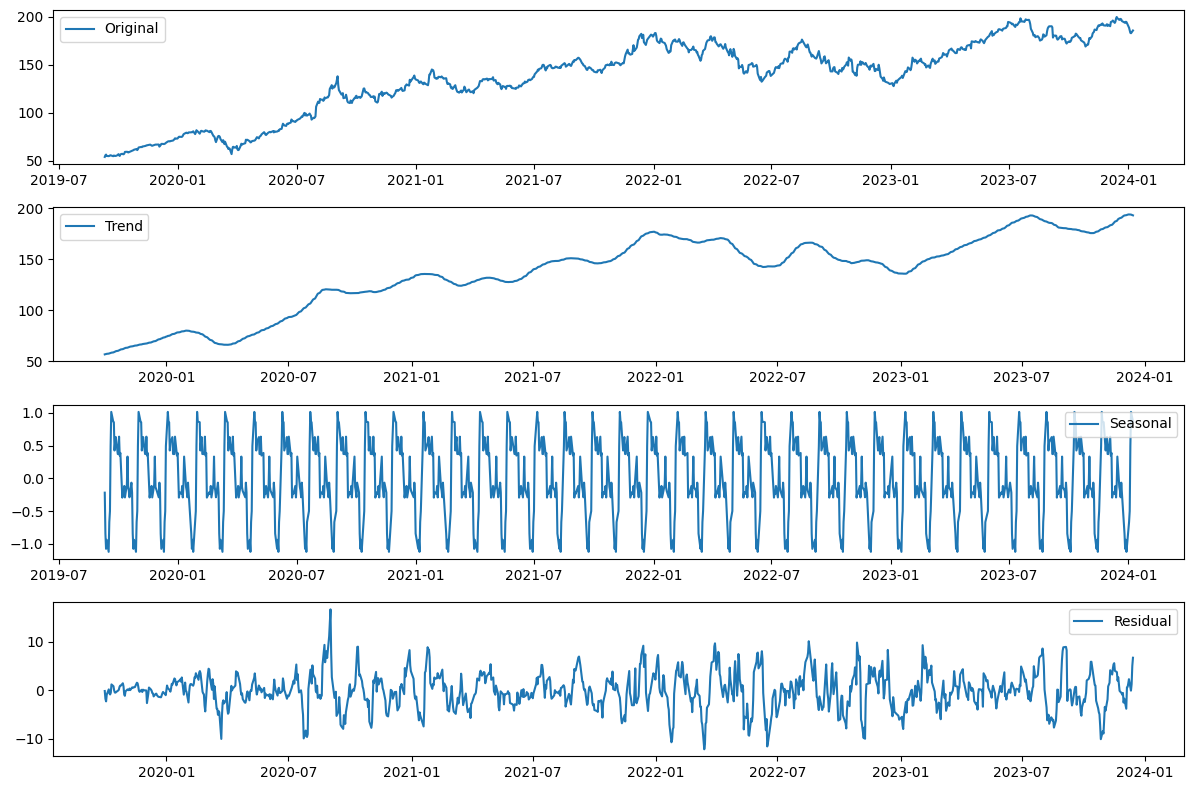

In [ ]:

# Check stationarity using Augmented Dickey-Fuller test
result = adfuller(df['High'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critical Values: {result[4]}')

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['High'], label='Stock Price')
plt.title('Stock Price Time Series')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(df['High'], model='additive', period=30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# decomposed plots
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df.index, df['High'], label='Original')
plt.legend()

plt.subplot(412)
plt.plot(df.index, trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(df.index, seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(df.index, residual, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
residual

components_df = pd.DataFrame({

    'Trend': trend,
    'Seasonal': seasonal,
    'Residual': residual
})

# Display the DataFrame
print(components_df.head(10))

            Trend  Seasonal  Residual
Date                                 
2019-09-10    NaN -0.218804       NaN
2019-09-11    NaN -0.843808       NaN
2019-09-12    NaN -1.076816       NaN
2019-09-13    NaN -0.938958       NaN
2019-09-16    NaN -1.122960       NaN
2019-09-17    NaN -0.668122       NaN
2019-09-18    NaN -0.499606       NaN
2019-09-19    NaN  0.492582       NaN
2019-09-20    NaN  1.015652       NaN
2019-09-23    NaN  0.868593       NaN


In [ ]:
# Assuming df is your DataFrame with columns 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'
columns_to_difference = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Apply differencing to each column
for column in columns_to_difference:
    df[f'{column}_diff'] = df[column].diff()

# Check stationarity for each differenced column
for column in columns_to_difference:
    result_diff = adfuller(df[f'{column}_diff'].dropna(), autolag='AIC')
    print(f'ADF Statistic (after differencing {column}): {result_diff[0]}')
    print(f'p-value (after differencing {column}): {result_diff[1]}')
    print(f'Critical Values (after differencing {column}): {result_diff[4]}')

# Optionally, you can drop the original columns if you want to keep only the differenced ones
df = df.drop(columns=columns_to_difference)
df

ADF Statistic (after differencing Open): -34.74509903392761
p-value (after differencing Open): 0.0
Critical Values (after differencing Open): {'1%': -3.4363746281360426, '5%': -2.864200133611212, '10%': -2.568186343567528}
ADF Statistic (after differencing High): -30.207629666933084
p-value (after differencing High): 0.0
Critical Values (after differencing High): {'1%': -3.4363746281360426, '5%': -2.864200133611212, '10%': -2.568186343567528}
ADF Statistic (after differencing Low): -22.995380906183957
p-value (after differencing Low): 0.0
Critical Values (after differencing Low): {'1%': -3.436380183743342, '5%': -2.8642025841870655, '10%': -2.568187648736553}
ADF Statistic (after differencing Close): -34.2011730154463
p-value (after differencing Close): 0.0
Critical Values (after differencing Close): {'1%': -3.4363746281360426, '5%': -2.864200133611212, '10%': -2.568186343567528}
ADF Statistic (after differencing Adj Close): -34.18331742186439
p-value (after differencing Adj Close): 0.

,Open_diff,High_diff,Low_diff,Close_diff,Adj Close_diff,Volume_diff
Date,,,,,,
2019-09-10,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-11,1.052502,1.732502,1.504997,1.722500,1.673096,50046800.0
2019-09-12,1.682499,0.677498,1.282501,-0.125000,-0.121414,-48251600.0
2019-09-13,-1.200001,-1.407501,-1.459999,-1.084999,-1.053875,30146400.0
2019-09-16,-0.567501,-0.164997,0.134998,0.287498,0.279255,-74420800.0
...,...,...,...,...,...,...
2024-01-02,-6.750000,-5.959991,-7.839996,-6.889999,-6.889999,39859900.0
2024-01-03,-2.929993,-2.559998,-0.460007,-1.389999,-1.389999,-24074200.0
2024-01-04,-2.070007,-2.790009,-2.549988,-2.339996,-2.339996,13569100.0


**Feature** **engineering**

Additional features
- **High_Lag_1, High_Lag_2, High_Lag_3:**
  - These columns represent lagged versions of the 'High' stock price, capturing its values from the previous 1, 2, and 3 days.

- **High_Rolling_Avg:**
  - This column represents the rolling average of the 'High' stock price over a 5-day window. It helps smooth out short-term fluctuations and highlights trends.

- **High_Pct_Change:**
  - This column represents the percentage change in the 'High' stock price compared to the previous day. It captures the relative daily changes in the stock price.

- **Day_of_Week:**
  - This column represents the day of the week (0 to 6, where 0 is Monday and 6 is Sunday) corresponding to each date. It introduces a categorical feature indicating the day of the week.

- **Volume_MA:**
  - This column represents the moving average of the 'Volume' over a 10-day window. It helps smooth out fluctuations in trading volume and captures trends.

- **High_Volatility:**
  - This column represents the volatility of the 'High' stock price, calculated as the rolling standard deviation of percentage changes over a 20-day window. It indicates the level of uncertainty or variability in the stock price.

- **Interaction_Term:**
  - This column represents an interaction term between the 'Open' price and 'Volume'. It captures the combined effect of these two features.


In [ ]:


# Creating lag features for the 'High' column
for i in range(1, 4):  # Create lags for the past 3 days
    df[f'High_Lag_{i}'] = df['High_diff'].shift(i)

# Creating rolling average for the 'High' column
df['High_Rolling_Avg'] = df['High_diff'].rolling(window=5).mean()

# Creating percentage change features
df['High_Pct_Change'] = df['High_diff'].pct_change() * 100

# Extracting day of the week as a feature
df['Day_of_Week'] = df.index.dayofweek

# Creating moving average for the 'Volume' column
df['Volume_MA'] = df['Volume_diff'].rolling(window=10).mean()

# Creating volatility measures
df['High_Volatility'] = df['High_diff'].pct_change().rolling(window=20).std()

# Creating an interaction term
df['Interaction_Term'] = df['Open_diff'] * df['Volume_diff']


In [ ]:
df.head()


,Open_diff,High_diff,Low_diff,Close_diff,Adj Close_diff,Volume_diff,High_Lag_1,High_Lag_2,High_Lag_3,High_Rolling_Avg,High_Pct_Change,Day_of_Week,Volume_MA,High_Volatility,Interaction_Term
Date,,,,,,,,,,,,,,,
2019-09-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
2019-09-11,1.052502,1.732502,1.504997,1.722500,1.673096,50046800.0,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,5.267434e+07
2019-09-12,1.682499,0.677498,1.282501,-0.125000,-0.121414,-48251600.0,1.732502,NaN,NaN,NaN,-60.894829,3,NaN,NaN,-8.118327e+07
2019-09-13,-1.200001,-1.407501,-1.459999,-1.084999,-1.053875,30146400.0,0.677498,1.732502,NaN,NaN,-307.749913,4,NaN,NaN,-3.617570e+07
2019-09-16,-0.567501,-0.164997,0.134998,0.287498,0.279255,-74420800.0,-1.407501,0.677498,1.732502,NaN,-88.277303,0,NaN,NaN,4.223388e+07


In [ ]:
# checking for missing values and their percentages

# Calculate percentage of missing values per column
missing_percentage = df.isnull().mean() * 100

# Filter columns with missing values
columns_with_missing = missing_percentage[missing_percentage > 0].index

# Print
print(f"Columns with missing values:\n{missing_percentage[columns_with_missing]}")

Columns with missing values:
Open_diff           0.091743
High_diff           0.091743
Low_diff            0.091743
Close_diff          0.091743
Adj Close_diff      0.091743
Volume_diff         0.091743
High_Lag_1          0.183486
High_Lag_2          0.275229
High_Lag_3          0.366972
High_Rolling_Avg    0.458716
High_Pct_Change     0.183486
Volume_MA           0.917431
High_Volatility     7.431193
Interaction_Term    0.091743
dtype: float64


In [ ]:
# checking for missing values and their percentages

# Calculate percentage of missing values per column
missing_percentage = df.isnull().mean() * 100

# Filter columns with missing values
columns_with_missing = missing_percentage[missing_percentage > 0].index

# Print
print(f"Columns with missing values:\n{missing_percentage[columns_with_missing]}")

Columns with missing values:
Open_diff           0.091743
High_diff           0.091743
Low_diff            0.091743
Close_diff          0.091743
Adj Close_diff      0.091743
Volume_diff         0.091743
High_Lag_1          0.183486
High_Lag_2          0.275229
High_Lag_3          0.366972
High_Rolling_Avg    0.458716
High_Pct_Change     0.183486
Volume_MA           0.917431
High_Volatility     7.431193
Interaction_Term    0.091743
dtype: float64


In [ ]:
# dropping rows with missing values
subset = ['Open_diff', 'High_diff', 'Low_diff', 'Close_diff', 'Adj Close_diff',
                'Volume_diff', 'High_Lag_1', 'High_Lag_2', 'High_Lag_3',
                'High_Rolling_Avg', 'High_Pct_Change', 'Volume_MA',
                'High_Volatility', 'Interaction_Term']

#subset=["Open_diff","High_Lag_1","High_Lag_2","High_Lag_3","High_Rolling_Avg","High_Pct_Change","Volume_MA","High_Volatility"]
df.dropna(subset=subset, inplace=True)

In [ ]:
df.columns

Index(['Open_diff', 'High_diff', 'Low_diff', 'Close_diff', 'Adj Close_diff',
       'Volume_diff', 'High_Lag_1', 'High_Lag_2', 'High_Lag_3',
       'High_Rolling_Avg', 'High_Pct_Change', 'Day_of_Week', 'Volume_MA',
       'High_Volatility', 'Interaction_Term'],
      dtype='object')

**Standardization and PCA**

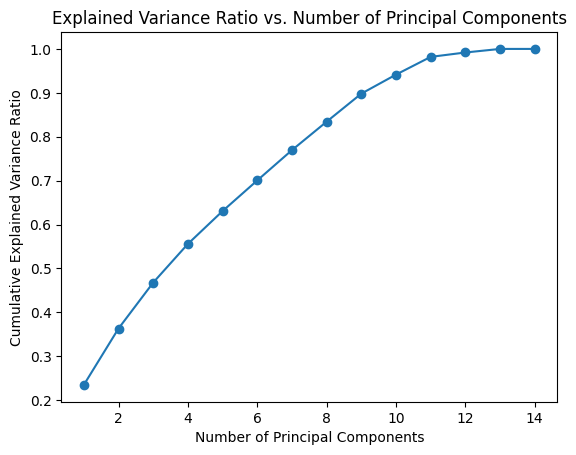

In [ ]:
# making a copy of the df
df_std = df.copy(deep=True)

# Excluding the target variable(High)
independent_features = df_std [['Open_diff', 'Low_diff', 'Close_diff', 'Adj Close_diff',
       'Volume_diff', 'High_Lag_1', 'High_Lag_2', 'High_Lag_3',
       'High_Rolling_Avg', 'High_Pct_Change', 'Day_of_Week', 'Volume_MA',
       'High_Volatility', 'Interaction_Term']]

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize the numerical features
independent_std = scaler.fit_transform(independent_features)

# Initialize PCA
pca = PCA()

# Fit PCA on standardized numerical features
pca_result = pca.fit_transform(independent_std)

# Plot Explained Variance Ratio
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.cumsum(explained_var_ratio)

# Plot Explained Variance Ratio
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.show()


In [ ]:
n_components = 11 # desired number of principal components

# PCA again with the cdesired number of principal components
pca = PCA(n_components=n_components)
pca_result2 = pca.fit_transform(independent_std)

# DataFrame with 6 principal components
df_pca = pd.DataFrame(data=pca_result2, columns=[f'PC{i+1}' for i in range(n_components)])

# Set the index of df_pca to match df_std
df_pca.index = df_std.index

# Combining the dfs
df_combined = pd.concat([df_std[['High_diff']], df_pca], axis=1)



In [ ]:
df_combined.head(40)

,High_diff,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Date,,,,,,,,,,,,
2019-10-09,-0.067501,0.212023,0.184558,-0.782170,-0.624612,1.056214,-0.162824,1.606404,-0.350678,0.129731,0.221302,0.594881
2019-10-10,0.662502,0.148033,-0.068523,1.523609,0.169602,0.367485,0.035803,1.915159,-0.292639,0.480731,0.127124,-0.165089
2019-10-11,1.799999,0.786733,-0.143551,2.527913,0.728259,0.826952,-0.513855,1.592734,0.094066,0.679788,0.210056,0.038734
2019-10-14,0.122501,0.309867,0.095404,-2.153921,0.419202,1.468460,0.436049,1.041022,-1.219059,0.362264,0.639231,0.648151
2019-10-15,-0.120003,0.024905,-0.231477,-1.074263,-0.465981,1.247973,0.068064,1.297661,-0.509728,0.739737,-0.553818,-0.478205
2019-10-16,-0.602497,-0.353966,-0.071331,-0.988586,-0.806670,1.258422,-0.147958,1.615794,0.364966,0.202223,-0.061511,-0.519035
2019-10-17,0.227497,-0.082833,0.345042,-0.372600,-0.321512,0.815869,-0.720897,1.731025,0.377722,0.522269,-0.245983,-0.225968
2019-10-18,0.357502,-0.286528,0.285882,0.616194,0.026315,0.628840,-1.104369,1.854521,0.763216,0.557799,-0.114719,-0.823493
2019-10-21,0.852501,0.502792,0.713519,-0.996700,0.129416,1.456351,0.497795,1.027784,-0.877709,0.484435,-0.310356,-0.640614


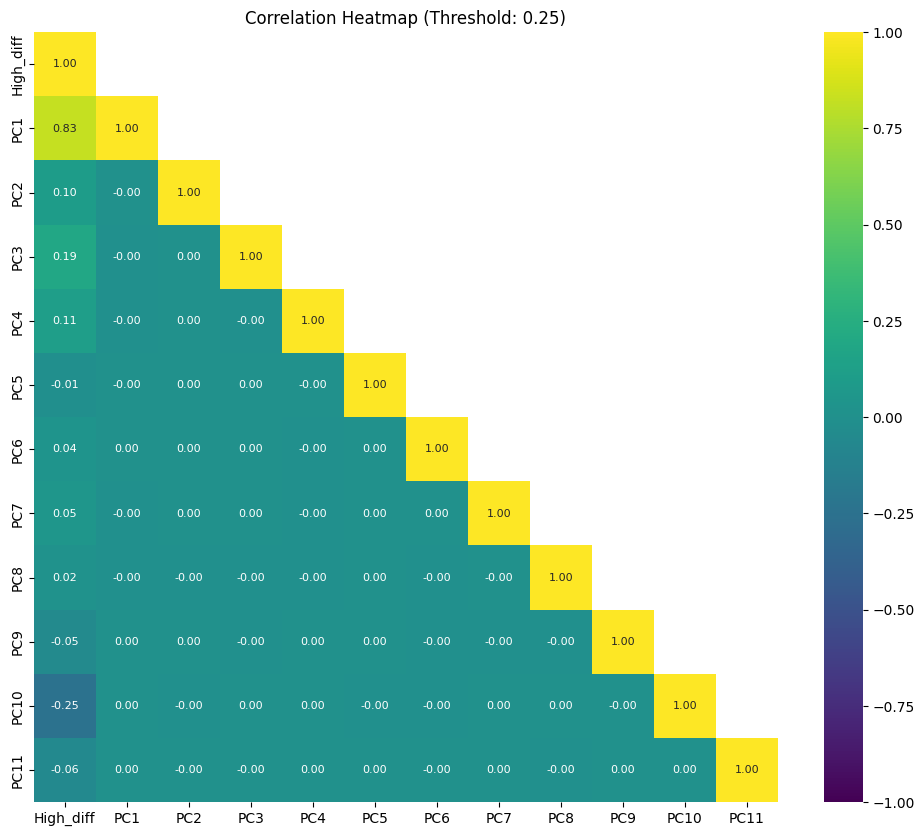

In [ ]:
Corr = df_combined.corr()

# correlation threshold
threshold = 0.25

# values below the threshold masked
mask = np.triu(np.ones_like(Corr), k=1)
corr_matrix_masked = np.ma.masked_where(Corr.abs() < threshold, Corr)


plt.figure(figsize=(12, 10))

#  heatmap
sns.heatmap(Corr, mask=mask, cmap='viridis', vmax=1, vmin=-1, annot=True, fmt=".2f", annot_kws={"size": 8})

# title
plt.title(f'Correlation Heatmap (Threshold: {threshold})')

# Show the plot
plt.show()

# **Machine Learning**

In [ ]:
# Features, target variables

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    df_combined.iloc[:, 1:],  # Exclude the target variable in the features
    df_combined.iloc[:, 0],   # Target variable is in the first column
    test_size=0.2,
    random_state=42
)
X_train, X_test, y_train, y_test

(                 PC1       PC2       PC3       PC4       PC5       PC6  \
 Date                                                                     
 2019-11-19  0.071143 -0.069897 -0.571422  0.176852  0.095888  0.435202   
 2020-12-16  1.084026 -0.646073 -1.808635  1.857369 -0.498526 -1.137159   
 2022-01-07 -0.997123  1.849027  0.974633 -0.653277 -0.458692 -0.482900   
 2022-10-24  2.499556 -0.074048 -0.809062  1.211576  0.811883  0.195527   
 2023-06-30  2.726719 -0.401673  2.062612 -0.438942  0.815738 -1.205841   
 ...              ...       ...       ...       ...       ...       ...   
 2020-03-12 -6.873440 -1.162593  3.196535  1.857704 -1.886700 -3.040916   
 2020-12-02  1.072392 -1.696292 -0.920846 -0.030679  0.005041 -0.561199   
 2023-06-06 -0.097774 -0.814311 -1.180976 -0.200588  0.536823  0.936893   
 2021-09-27 -0.935994 -0.757542 -0.584178 -0.282467  0.181271  1.286552   
 2020-03-06 -1.805705 -0.836505  2.338581 -0.204939 -0.345554 -0.680470   
 
                  PC7  

In [ ]:
# support vector model
model = SVR(kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"SVR: {model.score(X_test,y_test)}")

SVR: 0.7660345792560108


XGBRegressor: 0.843068632531902


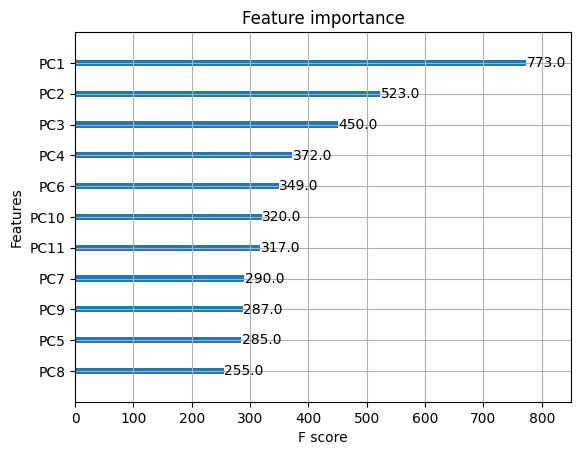

In [ ]:
# XGBoost

model=xgb.XGBRegressor()
model.fit(X_train, y_train)
print(f"XGBRegressor: {model.score(X_test,y_test)}")

# Plot feature importance
xgb.plot_importance(model, importance_type='weight')
plt.show()

In [ ]:
model= GradientBoostingRegressor()
model.fit(X_train, y_train)
print(f"GradientBoostingRegressor: {model.score(X_test,y_test)}")


GradientBoostingRegressor: 0.8454887140539447


SVR: 0.8515353280510182
XGBRegressor: 0.8457822559829482
GradientBoostingRegressor: 0.8579070027588964


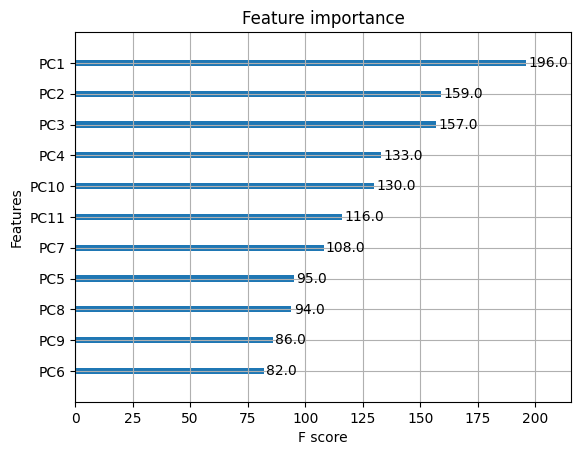

In [ ]:

# Support Vector Machine (SVR) with RBF kernel
svr_param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'epsilon': [0.1, 0.01, 0.001]
}

svr = SVR(kernel='rbf')
grid_svr = GridSearchCV(svr, svr_param_grid, scoring='r2', cv=5)
grid_svr.fit(X_train, y_train)

best_svr = grid_svr.best_estimator_

# XGBoost
xgb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model = xgb.XGBRegressor()
grid_xgb = GridSearchCV(xgb_model, xgb_param_grid, scoring='r2', cv=5)
grid_xgb.fit(X_train, y_train)

best_xgb = grid_xgb.best_estimator_

# Gradient Boosting Regressor
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

gb_model = GradientBoostingRegressor()
grid_gb = GridSearchCV(gb_model, gb_param_grid, scoring='r2', cv=5)
grid_gb.fit(X_train, y_train)

best_gb = grid_gb.best_estimator_

# Evaluate the models
y_pred_svr = best_svr.predict(X_test)
y_pred_xgb = best_xgb.predict(X_test)
y_pred_gb = best_gb.predict(X_test)

print(f"SVR: {best_svr.score(X_test, y_test)}")
print(f"XGBRegressor: {best_xgb.score(X_test, y_test)}")
print(f"GradientBoostingRegressor: {best_gb.score(X_test, y_test)}")

# Plot feature importance for XGBoost
xgb.plot_importance(best_xgb, importance_type='weight')
plt.show()


In [ ]:
# R-squared scores
r2_svr = r2_score(y_test, y_pred_svr)
r2_xgb = r2_score(y_test, y_pred_xgb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"SVR R2 Score: {r2_svr}")
print(f"XGBRegressor R2 Score: {r2_xgb}")
print(f"GradientBoostingRegressor R2 Score: {r2_gb}")

SVR R2 Score: 0.8515353280510182
XGBRegressor R2 Score: 0.8457822559829482
GradientBoostingRegressor R2 Score: 0.8579070027588964
